## Exploratory Data Analysis

- Load in your csv.gz's of results for each year extracted.
    1. Concatenate the data into 1 dataframe for the remainder of the analysis.
- Once you have your data from the API, they would like you to perform some light EDA to show:
    1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
        - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
    2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?
    3. What is the average revenue per certification category?
    4. What is the average budget per certification category?

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df2 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
# concat 2000/2001
df_c = pd.concat((df1, df2), axis = 0)

In [3]:
df_d = df_c.drop_duplicates()

In [4]:
df = df_d.loc[(df_d['budget'] != 0) | (df_d['revenue'] != 0)]

In [5]:
#Exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 1214
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                626 non-null    object 
 1   adult                  625 non-null    float64
 2   backdrop_path          530 non-null    object 
 3   belongs_to_collection  105 non-null    object 
 4   budget                 625 non-null    float64
 5   genres                 625 non-null    object 
 6   homepage               77 non-null     object 
 7   id                     625 non-null    float64
 8   original_language      625 non-null    object 
 9   original_title         625 non-null    object 
 10  overview               623 non-null    object 
 11  popularity             625 non-null    float64
 12  poster_path            603 non-null    object 
 13  production_companies   625 non-null    object 
 14  production_countries   625 non-null    object 
 15  relea

In [6]:
# Count the number of movies that have valid financial information
valid_movies = df.shape[0]
print("Number of movies with valid financial information: ", valid_movies)

Number of movies with valid financial information:  626


In [7]:
# Count the number of movies in each certification category
certification_count = df.groupby('certification').size().reset_index(name='counts')
print(certification_count)

  certification  counts
0             G      14
1            NR      17
2            PG      35
3         PG-13     131
4             R     229


In [8]:
# Calculate the average revenue per certification category
average_revenue = df.groupby('certification')['revenue'].mean().reset_index(name='average_revenue')
print(average_revenue)

  certification  average_revenue
0             G     1.237463e+08
1            NR     8.887611e+06
2            PG     1.126496e+08
3         PG-13     9.926299e+07
4             R     3.321119e+07


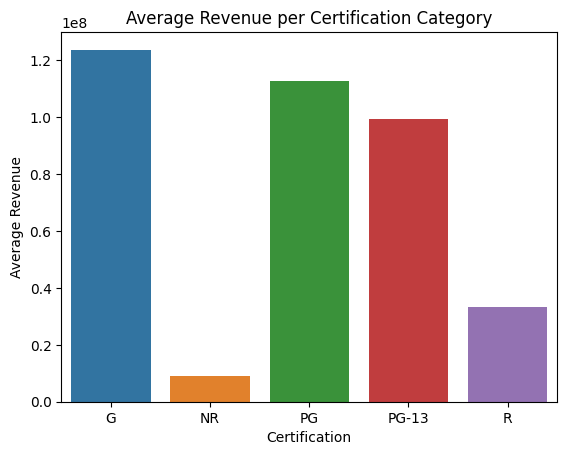

In [9]:
# Create a bar chart of average revenue per certification category
sns.barplot(x='certification', y='average_revenue', data=average_revenue)
plt.xlabel('Certification')
plt.ylabel('Average Revenue')
plt.title('Average Revenue per Certification Category')
plt.show()

In [10]:
# Calculate the average budget per certification category
average_budget = df.groupby('certification')['budget'].mean().reset_index(name='average_budget')
print(average_budget)

  certification  average_budget
0             G    4.085714e+07
1            NR    6.302358e+06
2            PG    4.496429e+07
3         PG-13    4.315388e+07
4             R    1.974674e+07


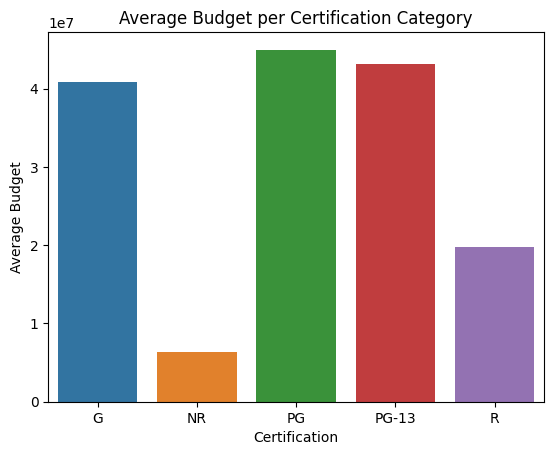

In [11]:
# Create a bar chart of average budget per certification category
sns.barplot(x='certification', y='average_budget', data=average_budget)
plt.xlabel('Certification')
plt.ylabel('Average Budget')
plt.title('Average Budget per Certification Category')
plt.show()

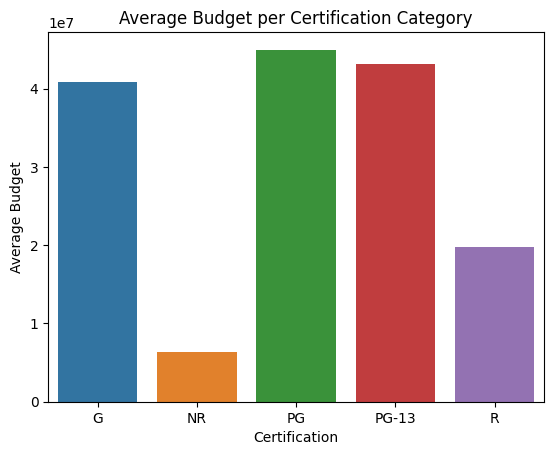

In [12]:
# Create a bar chart of average budget per certification category
sns.barplot(x='certification', y='average_budget', data=average_budget)
plt.xlabel('Certification')
plt.ylabel('Average Budget')
plt.title('Average Budget per Certification Category')
plt.show()

In [13]:
# save merged df 
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

In [14]:
merged_df = pd.read_csv("Data/tmdb_results_combined.csv.gz")
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                626 non-null    object 
 1   adult                  625 non-null    float64
 2   backdrop_path          530 non-null    object 
 3   belongs_to_collection  105 non-null    object 
 4   budget                 625 non-null    float64
 5   genres                 625 non-null    object 
 6   homepage               77 non-null     object 
 7   id                     625 non-null    float64
 8   original_language      625 non-null    object 
 9   original_title         625 non-null    object 
 10  overview               623 non-null    object 
 11  popularity             625 non-null    float64
 12  poster_path            603 non-null    object 
 13  production_companies   625 non-null    object 
 14  production_countries   625 non-null    object 
 15  releas

imdb_id  adult                     backdrop_path belongs_to_collection  \
0          0    NaN                               NaN                   NaN   
1  tt0035423    0.0  /hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg                   NaN   
2  tt0118589    0.0  /9NZAirJahVilTiDNCHLFcdkwkiy.jpg                   NaN   
3  tt0118652    0.0  /mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg                   NaN   
4  tt0119004    0.0  /7xrlSPGDO4CDT6IHTctDlkYxTzw.jpg                   NaN   

       budget                                             genres homepage  \
0         NaN                                                NaN      NaN   
1  48000000.0  [{'id': 10749, 'name': 'Romance'}, {'id': 14, ...      NaN   
2  22000000.0  [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...      NaN   
3   1000000.0  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...      NaN   
4         0.0                      [{'id': 18, 'name': 'Drama'}]      NaN   

        id original_language         original_title  ...     revenue  runtime  \
0      NaN               NaN                    NaN  ...         NaN      NaN   
1  11232.0                en         Kate & Leopold  ...  76019048.0    118.0   
2  10696.0                en                Glitter  ...   5271666.0    104.0   
3  17140.0                en  The Attic Expeditions  ...         0.0    100.0   
4  37857.0                en             Don's Plum  ...      6297.0     89.0   

                                    spoken_languages    status  \
0                                                NaN       NaN   
1  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
2  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
3  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
4  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   

                                             tagline                  title  \
0                                                NaN                    NaN   
1  If they lived in the same century, they'd be p...         Kate & Leopold   
2   In music she found her dream, her love, herself.                Glitter   
3  His search for peace of mind... will leave his...  The Attic Expeditions   
4                                                NaN             Don's Plum   

   video  vote_average vote_count certification  
0    NaN           NaN        NaN           NaN  
1    0.0         6.321     1165.0         PG-13  
2    0.0         4.596      120.0         PG-13  
3    0.0         5.100       28.0             R  
4    0.0         5.423       65.0           NaN  

[5 rows x 26 columns]